In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet
import csv

name_surname = 'bartoszbartoszewski'
print("Numer of working file", len(name_surname) % 16)

original_file = '../orginal_data/3_LUBUSKIE.csv'

Numer of working file 3


In [2]:
with open(original_file, 'rb') as f:
    enc = chardet.detect(f.read())

data_from_original_file = pd.read_csv(original_file ,  encoding = enc['encoding'])
# pd.DataFrame(data_from_original_file)

In [3]:
#skopiowanie orginalnych danych do folderu gdzie będą anzlizowane dane
copy_org_data = '../analysis_data/copy_of_original_data.csv'
data_from_original_file.to_csv(copy_org_data)

In [4]:
org_data = pd.read_csv(copy_org_data)
pd.DataFrame(org_data)

,Unnamed: 0.1,Unnamed: 0,Dni od zakupu,Marka,Wiek kupującego,Płeć kupującego,Ocena
0,0,0,3,Beko,35.0,bd.,3.0
1,1,1,8,Dyson,48.0,M,4.0
2,2,2,9,Electrolux,41.0,M,3.0
3,3,3,6,Electrolux,29.0,K,2.0
4,4,4,10,Tefal,49.0,K,5.0
...,...,...,...,...,...,...,...
516,516,516,6,Samsung,26.0,bd.,1.0
517,517,517,7,Dyson,NaN,K,2.0
518,518,518,7,Electrolux,28.0,bd.,1.5
519,519,519,8,Electrolux,52.0,K,3.5


In [5]:
org_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0.1     521 non-null    int64  
 1   Unnamed: 0       521 non-null    int64  
 2   Dni od zakupu    521 non-null    int64  
 3   Marka            521 non-null    object 
 4   Wiek kupującego  454 non-null    float64
 5   Płeć kupującego  521 non-null    object 
 6   Ocena            521 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 28.6+ KB


In [6]:
org_data.rename(columns={
        'Dni od zakupu': 'purchase_day',
        'Marka': 'brand',
        'Wiek kupującego': 'customer_age',
        'Płeć kupującego': 'sex',
        'Ocena': 'mark'
    }, inplace=True)
org_data['sex'] = org_data['sex'].replace({'bd.' : None})
org_data.drop(columns='Unnamed: 0', axis =1, inplace=True)
org_data.drop(columns='Unnamed: 0.1', axis =1, inplace=True)
link_changed_data = '../analysis_data/ordered_columns.csv'
org_data.to_csv(link_changed_data)

dg = pd.read_csv(link_changed_data)
dg.drop(columns='Unnamed: 0', axis =1, inplace=True)
pd.DataFrame(dg)

,purchase_day,brand,customer_age,sex,mark
0,3,Beko,35.0,NaN,3.0
1,8,Dyson,48.0,M,4.0
2,9,Electrolux,41.0,M,3.0
3,6,Electrolux,29.0,K,2.0
4,10,Tefal,49.0,K,5.0
...,...,...,...,...,...
516,6,Samsung,26.0,NaN,1.0
517,7,Dyson,NaN,K,2.0
518,7,Electrolux,28.0,NaN,1.5
519,8,Electrolux,52.0,K,3.5


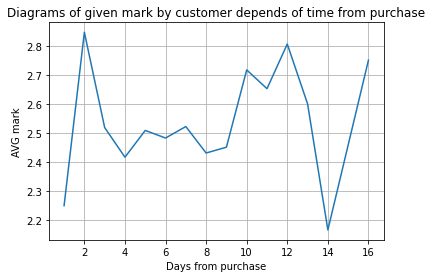

In [7]:
#data analysis of purching day
#Wykresy będą przedstawiać wystawiną zależność wystawionej oceny przez klijenta w zależności od dnia zakupu

mark_f_purchase_day = pd.DataFrame(dg.groupby("purchase_day").count()['mark'])
mark_f_purchase_day['avg_mark'] = pd.DataFrame(dg.groupby("purchase_day").mean()['mark'])

# pd.DataFrame(mark_f_purchase_day)

mark_f_purchase_day.avg_mark.plot(grid=True,title="Diagrams of given mark by customer depends of time from purchase", 
                                    xlabel="Days from purchase", ylabel="AVG mark")
copy_org_data = '../documents/saved_diagrams/purchase_mark.png'
plt.savefig(copy_org_data)
plt.show()

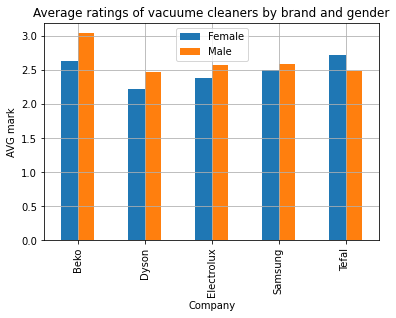

In [8]:
dg.pivot_table('mark', index='brand', columns='sex', aggfunc='mean').plot(kind='bar', ylabel='AVG mark', xlabel='Company', grid=1)
plt.legend(['Female','Male'])
plt.title('Average ratings of vacuume cleaners by brand and gender')
copy_org_data = '../documents/saved_diagrams/company_mark.png'
plt.savefig(copy_org_data)
plt.show()

In [9]:
#stworzenie tableli przestawnej w celu przyszłego łatwijeszego tworzenia wykresu
age_group_bins = [19, 30, 40, 50, 60, 70, 100]
bin_labels = ['19-30', '31-40', '41-50', '51-60', '61-70', '70+']
dg['AgeGroup'] = pd.cut(dg['customer_age'], bins=age_group_bins, labels=bin_labels, right=True)

privot_table_ages_rates = dg.pivot_table('mark', index='AgeGroup', columns='brand', aggfunc='mean')
pd.DataFrame(privot_table_ages_rates)

brand,Beko,Dyson,Electrolux,Samsung,Tefal
AgeGroup,,,,,
19-30,2.125000,3.571429,2.111111,2.714286,2.687500
31-40,2.666667,2.083333,2.463415,2.227273,2.779412
41-50,3.062500,2.394737,2.701299,2.548387,2.333333
51-60,3.250000,1.375000,2.500000,3.000000,2.250000
61-70,NaN,NaN,1.600000,2.333333,5.000000
70+,NaN,NaN,2.500000,NaN,NaN


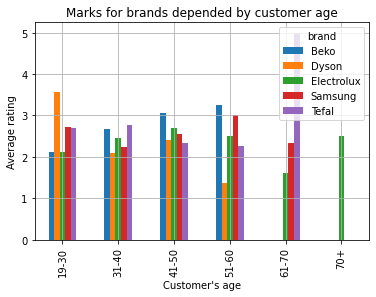

In [10]:
privot_table_ages_rates.plot(
                            kind='bar', 
                            ylabel='Average rating', 
                            xlabel="Customer's age",
                            title ='Marks for brands depended by customer age',
                            grid = True)
copy_org_data = '../documents/saved_diagrams/marks_brands_age.png'
plt.savefig(copy_org_data)
plt.show()